In [77]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.cluster import KMeans

In [79]:
data_set = pd.read_csv('1.8_phones.csv')

In [80]:
data_set.head(12)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


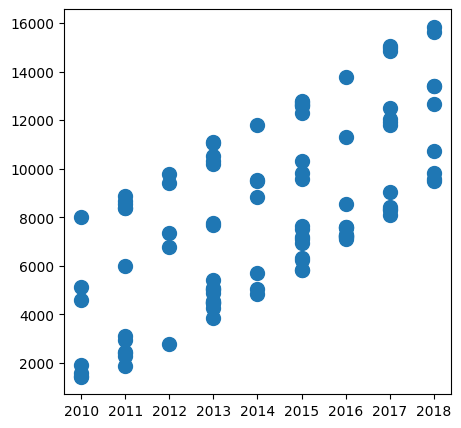

In [81]:
fig = plt.figure(figsize=(5, 5))  # создаем картинку
ax = plt.axes()
ax.scatter(data_set['year'], data_set['price'], s=100)
plt.show()

In [82]:
# выгружаем признаки и целевые значения в отдельные переменные
X = data_set[['year']]
y = data_set['price']

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [83]:
[b] = reg.coef_
a = reg.intercept_


# создаем функцию для предсказания цены дома
def reg_prediction(year):
    return a + b * year

In [84]:
reg_prediction(X.year[0])

9838.83475733595

In [85]:
reg.predict(X[0:1])[0]

9838.83475733595

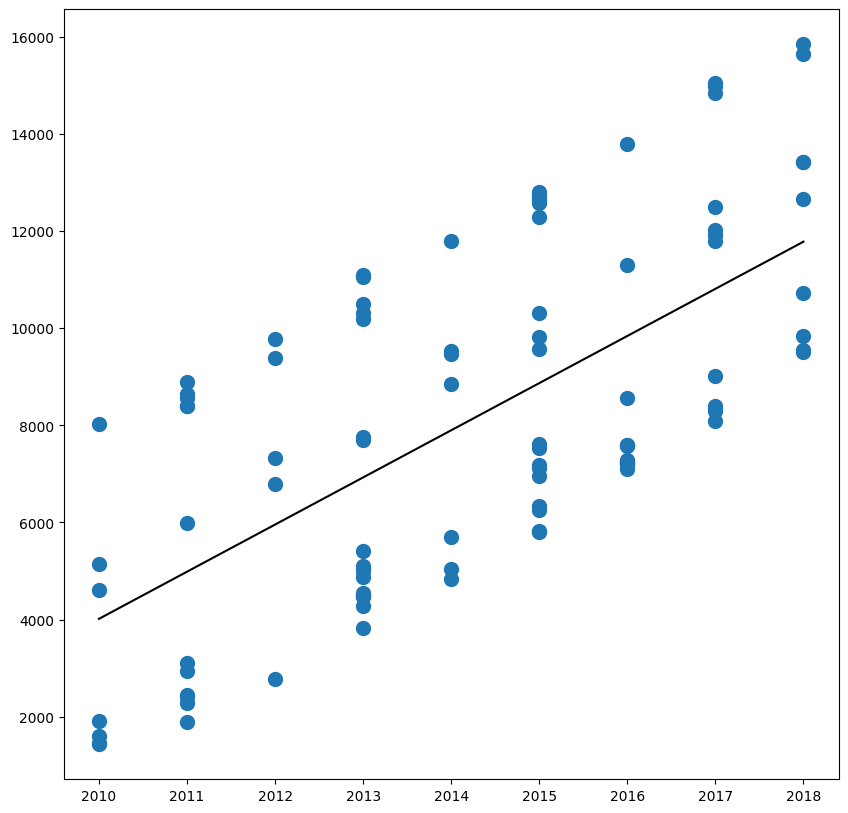

In [86]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(data_set['year'], data_set['price'], s=100)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c='black')

# отображаем картинку
plt.show()

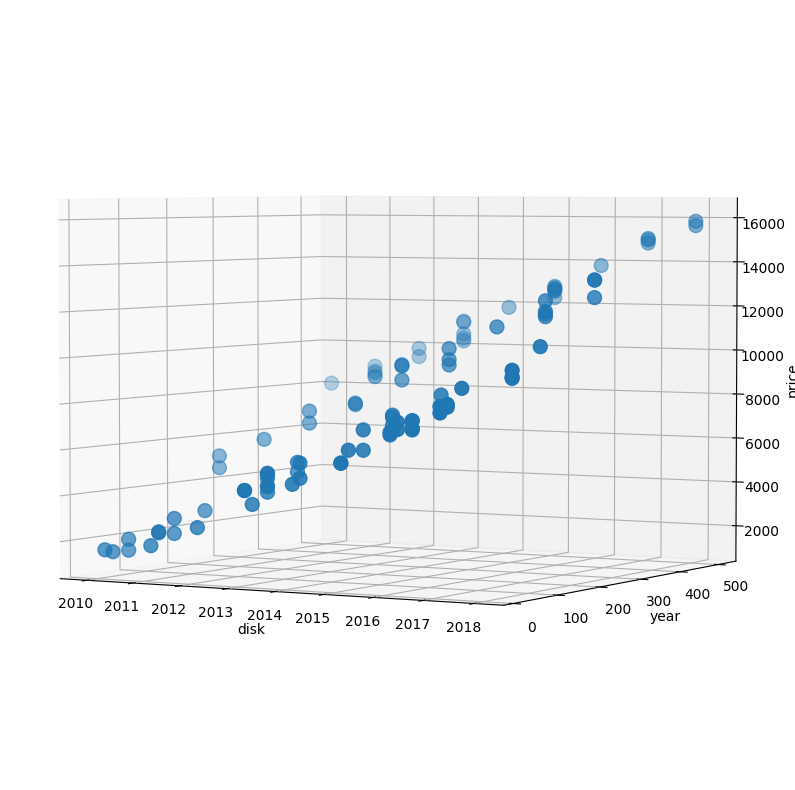

In [100]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(data_set['year'], data_set['disk'], data_set['price'], s=100)

# называем оси
ax.set_xlabel('disk')
ax.set_ylabel('year')
ax.set_zlabel('price')

# отображаем картинку
ax.elev = 3
plt.show()

In [101]:
# выгружаем признаки и целевые значения в отдельные переменные
X = data_set[["disk", "year"]]
y = data_set["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [102]:
# вытаскиваем нужные коэффициенты
[b1, b2] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(disk, year):
    return a + b1 * disk + b2 * year

In [105]:
# сделаем предсказания для различных конфигураций домов
d1, d2 = list(), list()
for x in np.linspace(min(data_set["disk"]), max(data_set["disk"]), 100):
    for y in np.linspace(min(data_set["year"]), max(data_set["year"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

C:\Users\maksi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


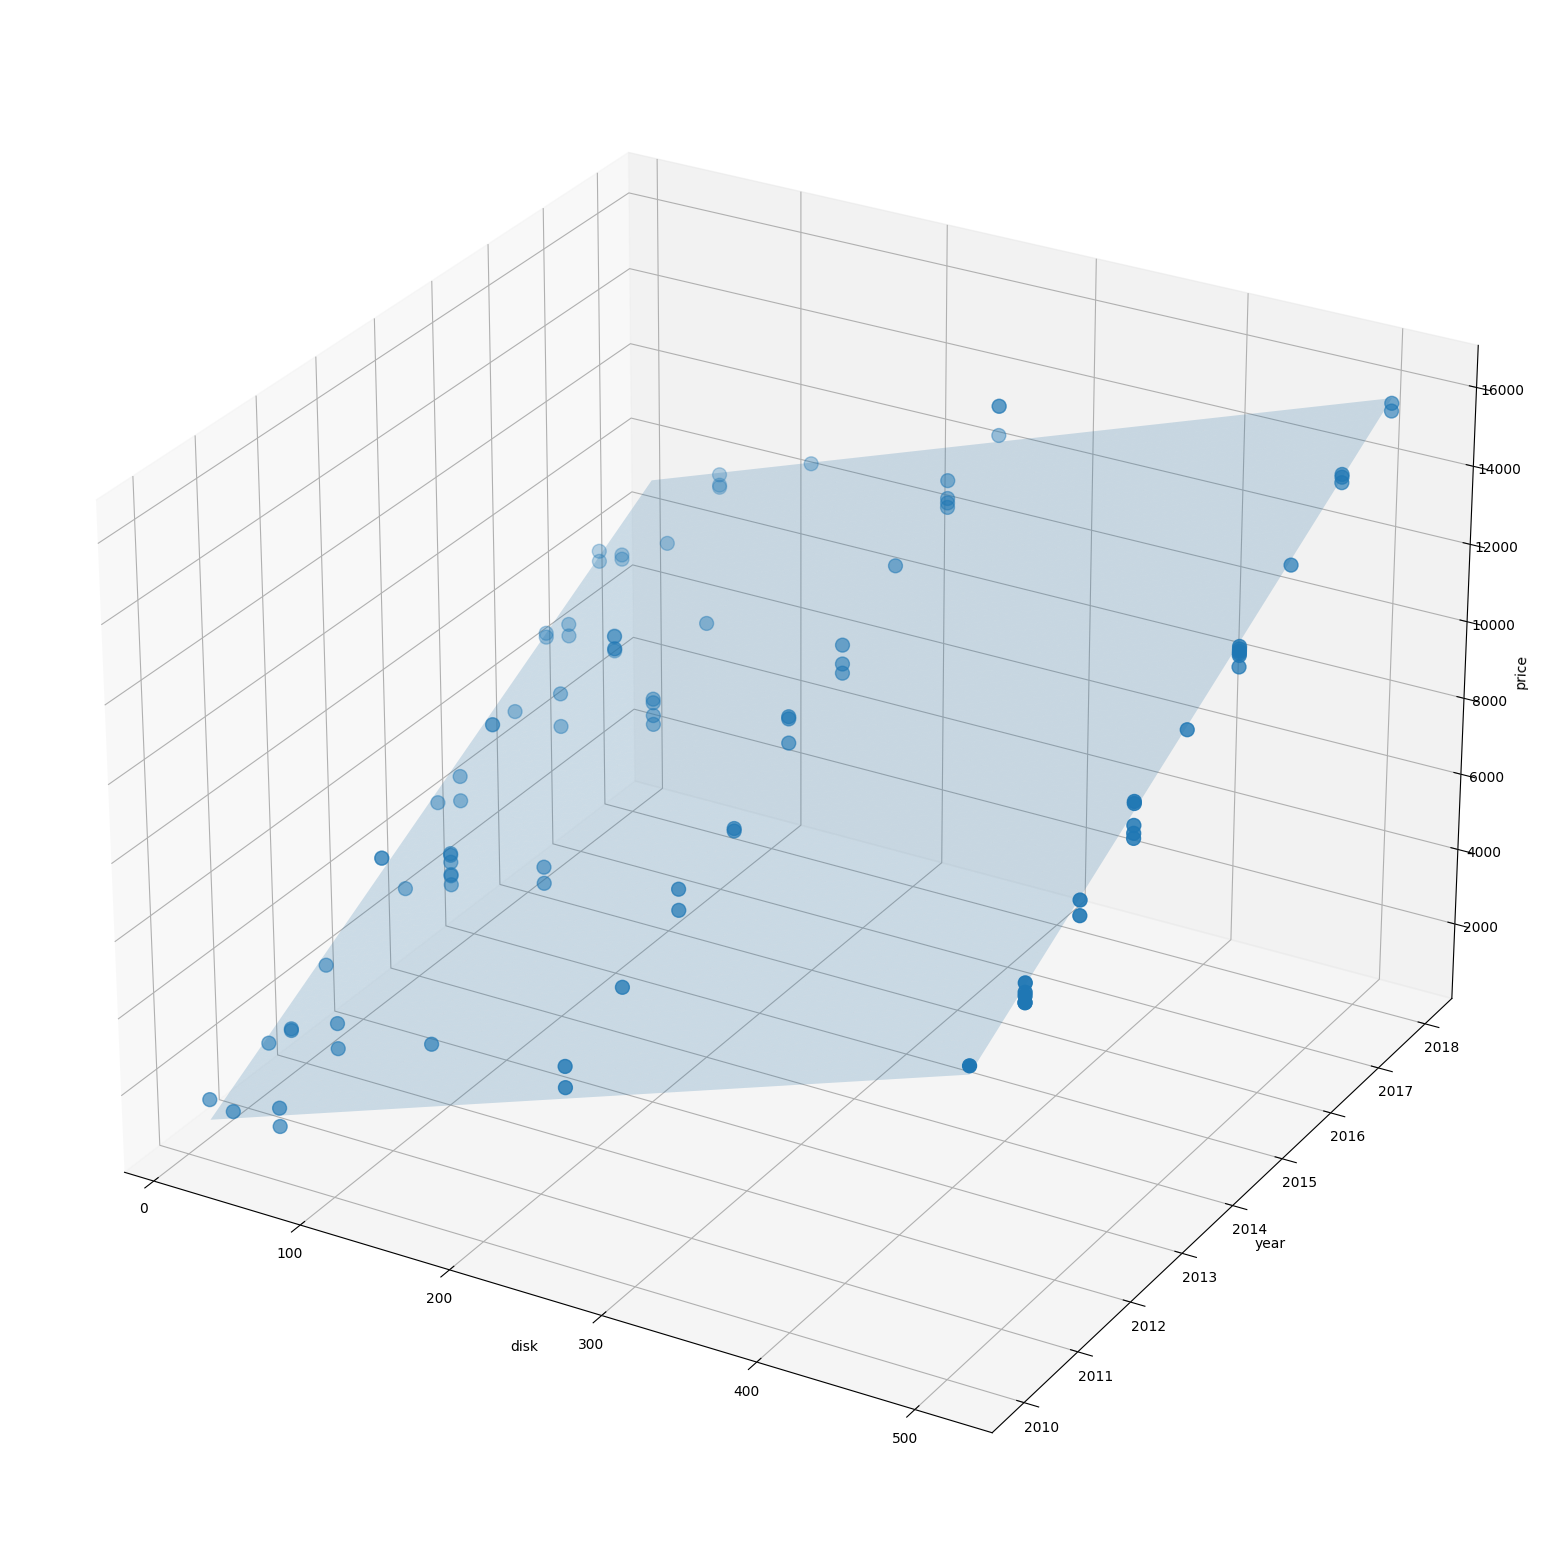

In [106]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(data_set["disk"], data_set["year"], data_set["price"], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()

In [109]:
# выгружаем признаки и целевые значения в отдельные переменные
X = data_set[["disk", "year"]]
y = data_set["os"]

# создаем классификатор
cl = DecisionTreeClassifier().fit(X, y)

In [110]:
# выведем информацию для интерпретации построенной модели
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [116]:
# проведем классификацию
cl.predict(X[12:13])[0], y[13]

('iOS', 'Android')

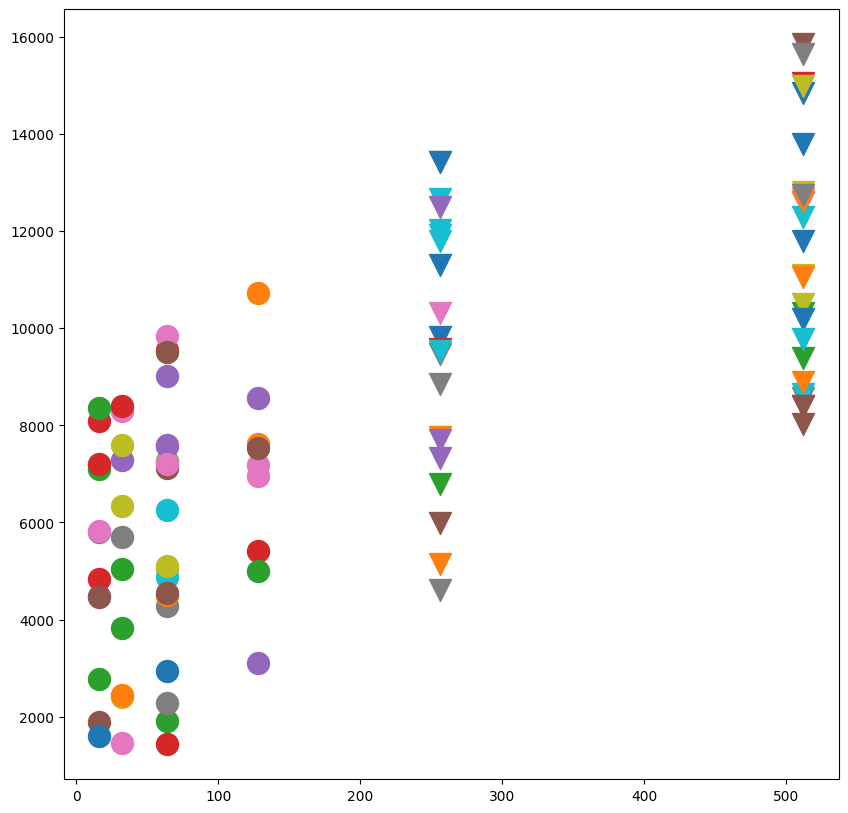

In [122]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(data_set.disk, data_set.price, data_set.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [124]:
# выгружаем признаки в отдельную переменную
X = data_set[["disk", "price"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=2).fit(X)

In [126]:
# смотрим центры кластеров
[c1, c2] = clust.cluster_centers_

In [128]:
clust.cluster_centers_

array([[  116.8       ,  5784.78333333],
       [  368.        , 11601.65      ]])

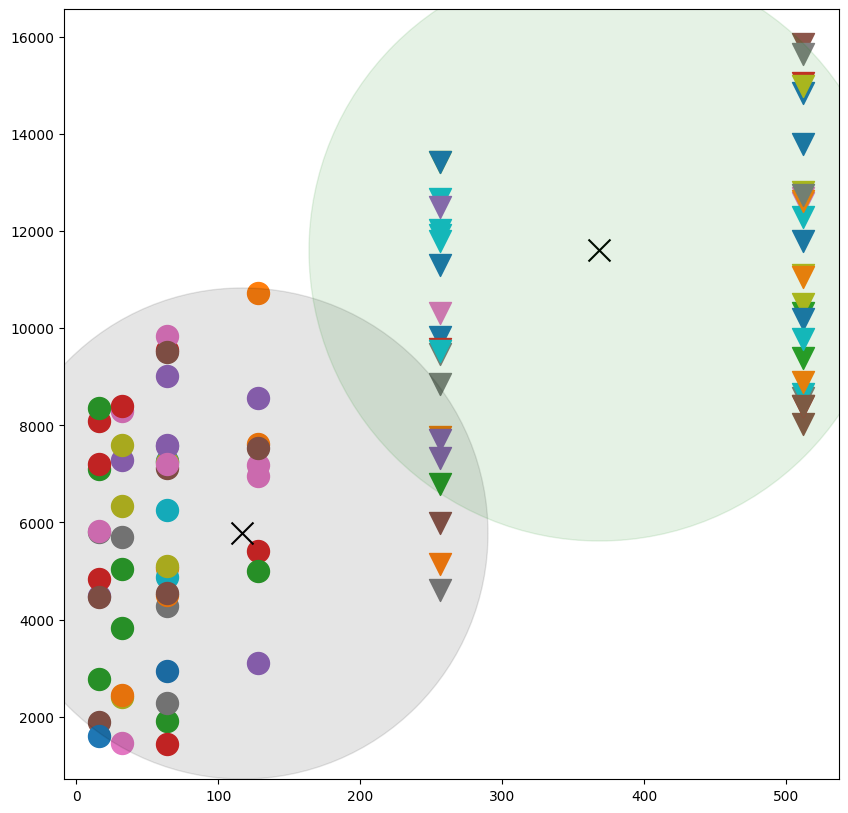

In [141]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(data_set.disk, data_set.price, data_set.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 5e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 7e2, c="green", alpha=0.1)


# отображаем картинку
plt.show()